In [1]:
import numpy as np
from skimage import io, filters, img_as_ubyte
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

In [2]:
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')
plt.style.use("seaborn")

In [3]:
sandHeap = SandHeap(source="./data/liutao/source1000-1500.npy",
                   se=ndi.generate_binary_structure(rank=3, connectivity=2), 
                   connectivity=1,
                   persistencePath='/home/chuan/',
                   cubeSize=64)
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

Function `_loadData` runs for 0h 0min 0.4s
(500, 1766, 1766) uint8 data-loaded


Now plotting the histogram...
Plotting Complete!


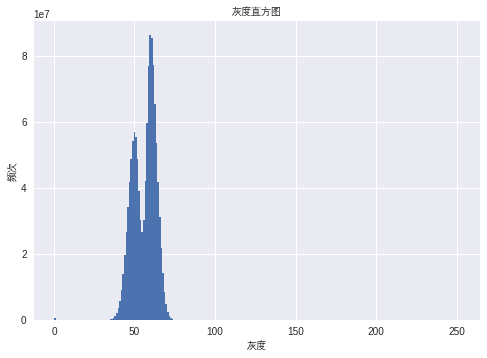

In [4]:
_ = sandHeap.drawHistogram()
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.savefig(f"/home/chuan/直方图-原始.png", dpi=150)
io.imsave('/home/chuan/原始.png', sandHeap.data[450])

Now plotting the histogram...
Plotting Complete!
Function `equalizeHist` runs for 0h 0min 59.4s


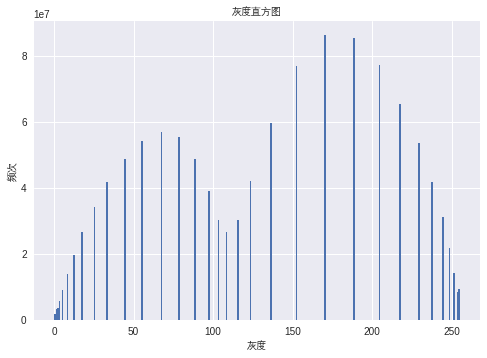

In [5]:
sandHeap.equalizeHist(draw=True)
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.savefig(f"/home/chuan/直方图-均衡.png", dpi=150)

In [6]:
io.imsave('/home/chuan/均衡.png', sandHeap.data[450])

Now plotting the histogram...
Plotting Complete!


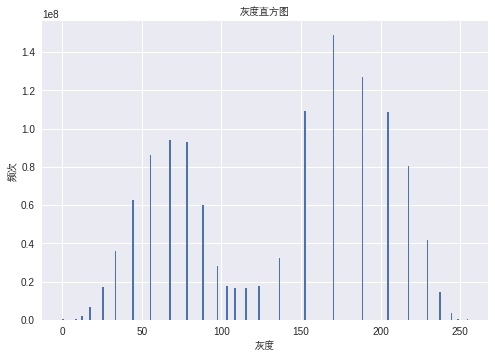

In [7]:
sandHeap.data = np.load('./data/liutao/filtered-3cycles.npy')
sandHeap.setStatus('filtered')
_ = sandHeap.drawHistogram()
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.savefig(f"/home/chuan/直方图-滤波.png", dpi=150)
io.imsave('/home/chuan/滤波.png', sandHeap.data[450])

In [8]:
frequency, binEnds = _[:2]
print(len(frequency), len(binEnds))

255 256


Now plotting the histogram...
Plotting Complete!


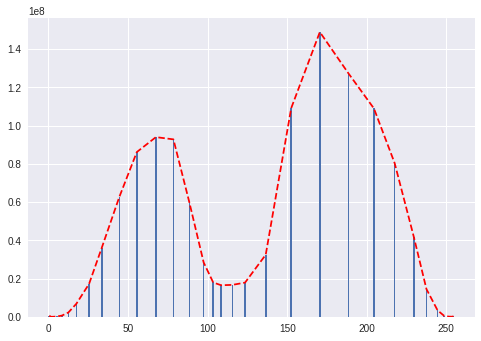

In [9]:
binCtr = [(binEnds[i]+binEnds[i+1])/2 for i in range(len(frequency))]

frequency, binCtr = np.array(frequency), np.array(binCtr)
mask = frequency > 0
plt.plot(binCtr[mask], frequency[mask], 'r--')
_ = sandHeap.drawHistogram()

In [10]:
%%time
thrd = filters.threshold_otsu(sandHeap.data[sandHeap.circleMask])
print(thrd)

123
CPU times: user 5.56 s, sys: 1.51 s, total: 7.07 s
Wall time: 7.08 s
